In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("updated sql retail price project.csv")
df.head()

product_id product_category_name  month_year  qty  total_price  \
0       bed1        bed_bath_table  2017-05-01    1        45.95   
1       bed1        bed_bath_table  2017-06-01    3       137.85   
2       bed1        bed_bath_table  2017-07-01    6       275.70   
3       bed1        bed_bath_table  2017-08-01    4       183.80   
4       bed1        bed_bath_table  2017-09-01    2        91.90   

   freight_price  unit_price  product_name_lenght  product_description_lenght  \
0      15.100000       45.95                   39                         161   
1      12.933333       45.95                   39                         161   
2      14.840000       45.95                   39                         161   
3      14.287500       45.95                   39                         161   
4      15.100000       45.95                   39                         161   

   product_photos_qty  ...      comp_2  ps2        fp2  comp_3  ps3  \
0                   2  ...  215.000000  4.4   8.760000   45.95    4   
1                   2  ...  209.000000  4.4  21.322000   45.95    4   
2                   2  ...  205.000000  4.4  22.195932   45.95    4   
3                   2  ...  199.509804  4.4  19.412885   45.95    4   
4                   2  ...  163.398710  4.4  24.324687   45.95    4   

         fp3  lag_price  cost_price  profit  profit_margin  
0  15.100000      45.90       32.17   13.78          29.99  
1  12.933333      45.95       32.17   41.34          29.99  
2  14.840000      45.95       32.17   82.68          29.99  
3  14.287500      45.95       32.17   55.12          29.99  
4  15.100000      45.95       32.17   27.56          29.99  

[5 rows x 33 columns]

In [5]:
# calculating inventory metrics
# Assuming average_inventory = product of qty × unit_price / 2 
df["CpQt"] = df["cost_price"] * df["qty"]  # Cost of Goods Sold
df["average_inventory"] = (df["unit_price"] * df["qty"]) / 2

# Inventory Turnover
df["inventory_turnover"] = df["CpQt"] / df["average_inventory"]

# Days Inventory Held
df["days_inventory_held"] = 365 / df["inventory_turnover"]

In [12]:
print(df[["cost_price", "qty", "CpQt", "average_inventory", "inventory_turnover", "days_inventory_held"]].head())  # assumed inventory values
print(df[["inventory_turnover", "days_inventory_held"]].describe())  #Summary statistics
print(df[df["inventory_turnover"].isnull()])
print(df[df["days_inventory_held"] == 0])

   cost_price  qty    CpQt  average_inventory  inventory_turnover  \
0       32.17    1   32.17             22.975            1.400218   
1       32.17    3   96.51             68.925            1.400218   
2       32.17    6  193.02            137.850            1.400218   
3       32.17    4  128.68             91.900            1.400218   
4       32.17    2   64.34             45.950            1.400218   

   days_inventory_held  
0           260.673764  
1           260.673764  
2           260.673764  
3           260.673764  
4           260.673764  
       inventory_turnover  days_inventory_held
count          676.000000           676.000000
mean             1.399982           260.717619
std              0.000069             0.012820
min              1.399700           260.663760
25%              1.399954           260.714286
50%              1.400000           260.714286
75%              1.400000           260.722882
max              1.400271           260.770193
Empty DataFr

In [17]:
rows_before = df.shape[0]
# Replace infinite values with NA (missing)
df.replace([float("inf"), -float("inf")], pd.NA, inplace=True)
# Drop rows where key columns are missing
df.dropna(subset=["inventory_turnover", "days_inventory_held"], inplace=True)
rows_after = df.shape[0]

print(f"Rows removed: {rows_before - rows_after}")
print(df[["inventory_turnover", "days_inventory_held"]].head())

Rows removed: 0
   inventory_turnover  days_inventory_held
0            1.400218           260.673764
1            1.400218           260.673764
2            1.400218           260.673764
3            1.400218           260.673764
4            1.400218           260.673764


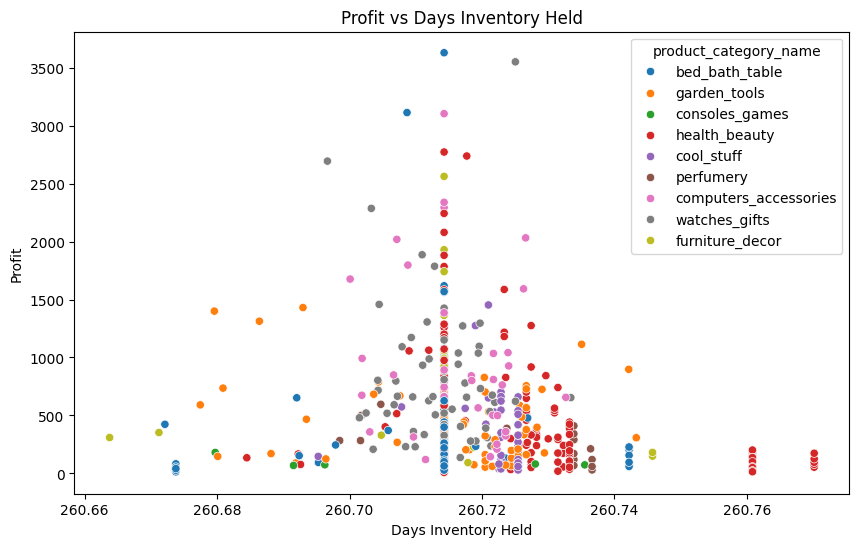

In [18]:
# Visualize profit and Inventory holding time
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="days_inventory_held", y="profit", hue="product_category_name")
plt.title("Profit vs Days Inventory Held")
plt.xlabel("Days Inventory Held")
plt.ylabel("Profit")
plt.show()

In [21]:
# Identifying slow moving/unprofitable products
# Products held for a long time or with low profit
slow_items = df[df["days_inventory_held"] > 90]
unprofitable_items = df[(df["profit"] < 100) & (df["days_inventory_held"] > 100)]

# Export if needed
unprofitable_items.to_csv("slow_or_unprofitable_items.csv", index=False)

print(unprofitable_items)


     product_id  product_category_name  month_year  qty  total_price  \
0          bed1         bed_bath_table  2017-05-01    1        45.95   
1          bed1         bed_bath_table  2017-06-01    3       137.85   
2          bed1         bed_bath_table  2017-07-01    6       275.70   
3          bed1         bed_bath_table  2017-08-01    4       183.80   
4          bed1         bed_bath_table  2017-09-01    2        91.90   
..          ...                    ...         ...  ...          ...   
660  computers2  computers_accessories  2018-08-01    2       155.80   
668        bed4         bed_bath_table  2018-05-01    2        95.80   
669        bed4         bed_bath_table  2018-06-01    4       191.60   
670        bed4         bed_bath_table  2018-07-01    2        95.80   
671        bed5         bed_bath_table  2017-05-01    1       215.00   

     freight_price  unit_price  product_name_lenght  \
0        15.100000       45.95                   39   
1        12.933333       

In [22]:
print(slow_items)

    product_id product_category_name  month_year  qty  total_price  \
0         bed1        bed_bath_table  2017-05-01    1        45.95   
1         bed1        bed_bath_table  2017-06-01    3       137.85   
2         bed1        bed_bath_table  2017-07-01    6       275.70   
3         bed1        bed_bath_table  2017-08-01    4       183.80   
4         bed1        bed_bath_table  2017-09-01    2        91.90   
..         ...                   ...         ...  ...          ...   
671       bed5        bed_bath_table  2017-05-01    1       215.00   
672       bed5        bed_bath_table  2017-06-01   10      2090.00   
673       bed5        bed_bath_table  2017-07-01   59     12095.00   
674       bed5        bed_bath_table  2017-08-01   52     10375.00   
675       bed5        bed_bath_table  2017-09-01   32      5222.36   

     freight_price  unit_price  product_name_lenght  \
0        15.100000       45.95                   39   
1        12.933333       45.95                   

In [24]:
category_summary = df.groupby("product_category_name").agg({
    "profit": "sum",
    "CpQt": "sum",
    "days_inventory_held": "mean"
}).sort_values("profit", ascending=False)

print(category_summary)

                         profit       CpQt  days_inventory_held
product_category_name                                          
health_beauty          63729.26  148690.31           260.726972
watches_gifts          62265.91  145288.86           260.713951
garden_tools           49028.19  114400.25           260.714887
computers_accessories  42578.67   99348.88           260.715624
bed_bath_table         28523.88   66556.59           260.712175
cool_stuff             17388.03   40568.26           260.721767
furniture_decor        17082.65   39860.18           260.713618
perfumery               6094.06   14218.58           260.722927
consoles_games          1739.87    4059.89           260.712453


In [25]:
print(df)

    product_id product_category_name  month_year  qty  total_price  \
0         bed1        bed_bath_table  2017-05-01    1        45.95   
1         bed1        bed_bath_table  2017-06-01    3       137.85   
2         bed1        bed_bath_table  2017-07-01    6       275.70   
3         bed1        bed_bath_table  2017-08-01    4       183.80   
4         bed1        bed_bath_table  2017-09-01    2        91.90   
..         ...                   ...         ...  ...          ...   
671       bed5        bed_bath_table  2017-05-01    1       215.00   
672       bed5        bed_bath_table  2017-06-01   10      2090.00   
673       bed5        bed_bath_table  2017-07-01   59     12095.00   
674       bed5        bed_bath_table  2017-08-01   52     10375.00   
675       bed5        bed_bath_table  2017-09-01   32      5222.36   

     freight_price  unit_price  product_name_lenght  \
0        15.100000       45.95                   39   
1        12.933333       45.95                   

In [27]:
df.to_csv("final_updated_file.csv", index=False)